# List 1, variant 15 - Tobiasz Wojnar
### Digital Signal Processing 2024/25
### University of Bielsko-Biala, semestr 1

## Task
Synthesize a discrete-time signal by using the IDFT in matrix notation
for different values of *N* . Show the matrices *W* and *K*. Plot the signal
synthesized.

$$x_\mu= [6, 4, 4, 5, 3, 4, 5, 0, 0, 0, 0]^T$$

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.linalg import inv
from numpy.fft import fft, ifft

In [5]:
x_mu = np.array([6, 4, 4, 5, 3, 4, 5, 0, 0, 0, 0], dtype=complex)
x_mu

array([6.+0.j, 4.+0.j, 4.+0.j, 5.+0.j, 3.+0.j, 4.+0.j, 5.+0.j, 0.+0.j,
       0.+0.j, 0.+0.j, 0.+0.j])

In [6]:
N = len(x_mu)
N

11

In [8]:
k = np.arange(N)
K = np.outer(k, k)  # get all possible entries k*mu in meaningful arrangement
K

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10],
       [  0,   2,   4,   6,   8,  10,  12,  14,  16,  18,  20],
       [  0,   3,   6,   9,  12,  15,  18,  21,  24,  27,  30],
       [  0,   4,   8,  12,  16,  20,  24,  28,  32,  36,  40],
       [  0,   5,  10,  15,  20,  25,  30,  35,  40,  45,  50],
       [  0,   6,  12,  18,  24,  30,  36,  42,  48,  54,  60],
       [  0,   7,  14,  21,  28,  35,  42,  49,  56,  63,  70],
       [  0,   8,  16,  24,  32,  40,  48,  56,  64,  72,  80],
       [  0,   9,  18,  27,  36,  45,  54,  63,  72,  81,  90],
       [  0,  10,  20,  30,  40,  50,  60,  70,  80,  90, 100]])

In [10]:
W = np.exp(+1j * 2*np.pi/N * K)  # analysis matrix for DFT
W

array([[ 1.        +0.j        ,  1.        +0.j        ,
         1.        +0.j        ,  1.        +0.j        ,
         1.        +0.j        ,  1.        +0.j        ,
         1.        +0.j        ,  1.        +0.j        ,
         1.        +0.j        ,  1.        +0.j        ,
         1.        +0.j        ],
       [ 1.        +0.j        ,  0.84125353+0.54064082j,
         0.41541501+0.909632j  , -0.14231484+0.98982144j,
        -0.65486073+0.75574957j, -0.95949297+0.28173256j,
        -0.95949297-0.28173256j, -0.65486073-0.75574957j,
        -0.14231484-0.98982144j,  0.41541501-0.909632j  ,
         0.84125353-0.54064082j],
       [ 1.        +0.j        ,  0.41541501+0.909632j  ,
        -0.65486073+0.75574957j, -0.95949297-0.28173256j,
        -0.14231484-0.98982144j,  0.84125353-0.54064082j,
         0.84125353+0.54064082j, -0.14231484+0.98982144j,
        -0.95949297+0.28173256j, -0.65486073-0.75574957j,
         0.41541501-0.909632j  ],
       [ 1.        +0.j     

True
DC is 1 as expected:  (0.5454545454545457+2.0185873175002847e-17j)


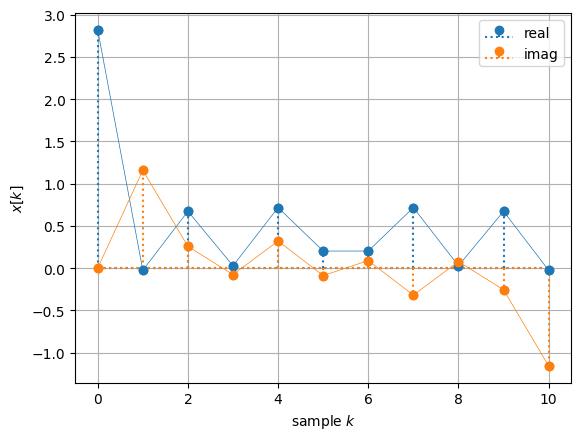

In [11]:
x_k = 1/N * np.matmul(W, x_mu)

plt.stem(k, np.real(x_k), label='real',
         markerfmt='C0o', basefmt='C0:', linefmt='C0:')
plt.stem(k, np.imag(x_k), label='imag',
         markerfmt='C1o', basefmt='C1:', linefmt='C1:')    
# note that connecting the samples by lines is actually wrong, we
# use it anyway for more visual convenience
plt.plot(k, np.real(x_k), 'C0o-', lw=0.5)
plt.plot(k, np.imag(x_k), 'C1o-', lw=0.5)
plt.xlabel(r'sample $k$')
plt.ylabel(r'$x[k]$')
plt.legend()
plt.grid(True)

# check if results are identical with numpy ifft package
print(np.allclose(ifft(x_mu), x_k))
print('DC is 1 as expected: ', np.mean(x_k))